In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head(5)

Unnamed: 0 Kyphosis  Age  Number  Start
0           1   absent   71       3      5
1           2   absent  158       3     14
2           3  present  128       4      5
3           4   absent    2       5      1
4           5   absent    1       4     15

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  81 non-null     int64 
 1   Kyphosis    81 non-null     object
 2   Age         81 non-null     int64 
 3   Number      81 non-null     int64 
 4   Start       81 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.3+ KB


In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


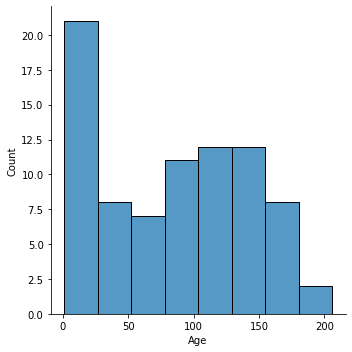

In [10]:
sns.displot(x=df['Age'])

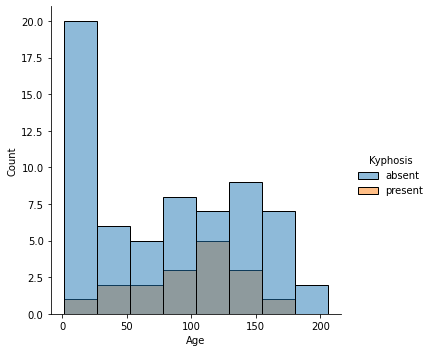

In [11]:
sns.displot(x=df['Age'], hue=df['Kyphosis'])

In [13]:
present= df[df['Kyphosis']=='present']

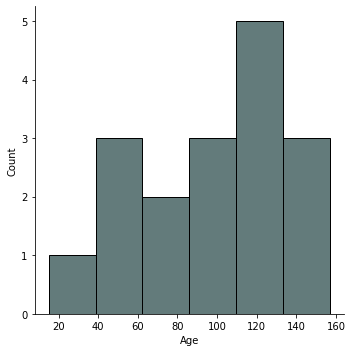

In [14]:
sns.displot(present['Age'],color='DarkSlateGrey')

In [15]:
absent=df[df['Kyphosis']=='absent']

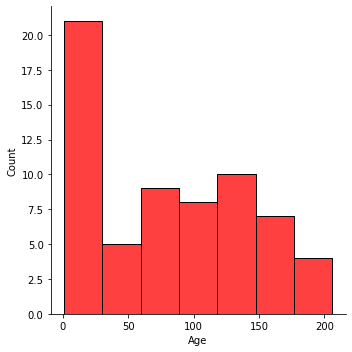

In [20]:
sns.displot(absent['Age'],bins=7,color='red')

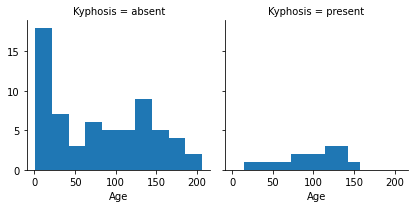

In [21]:
g = sns.FacetGrid(data=df,col='Kyphosis')
g.map(plt.hist,'Age')

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
predictions = dtree.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.83      0.71      0.77        21
     present       0.14      0.25      0.18         4

    accuracy                           0.64        25
   macro avg       0.49      0.48      0.48        25
weighted avg       0.72      0.64      0.68        25



In [30]:
print(confusion_matrix(y_test,predictions))

[[15  6]
 [ 3  1]]


In [31]:
len(y_test)

25

In [32]:
sum(y_test=='absent')

21

In [33]:
sum(y_test=='present')

4

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
rfc_pred = rfc.predict(X_test)

In [37]:
print(confusion_matrix(y_test,rfc_pred))

[[17  4]
 [ 2  2]]


In [38]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.89      0.81      0.85        21
     present       0.33      0.50      0.40         4

    accuracy                           0.76        25
   macro avg       0.61      0.65      0.62        25
weighted avg       0.80      0.76      0.78        25



In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [41]:
predictions = logmodel.predict(X_test)

In [42]:
confusion_matrix(y_test,predictions)

array([[15,  6],
       [ 2,  2]], dtype=int64)

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.88      0.71      0.79        21
     present       0.25      0.50      0.33         4

    accuracy                           0.68        25
   macro avg       0.57      0.61      0.56        25
weighted avg       0.78      0.68      0.72        25

